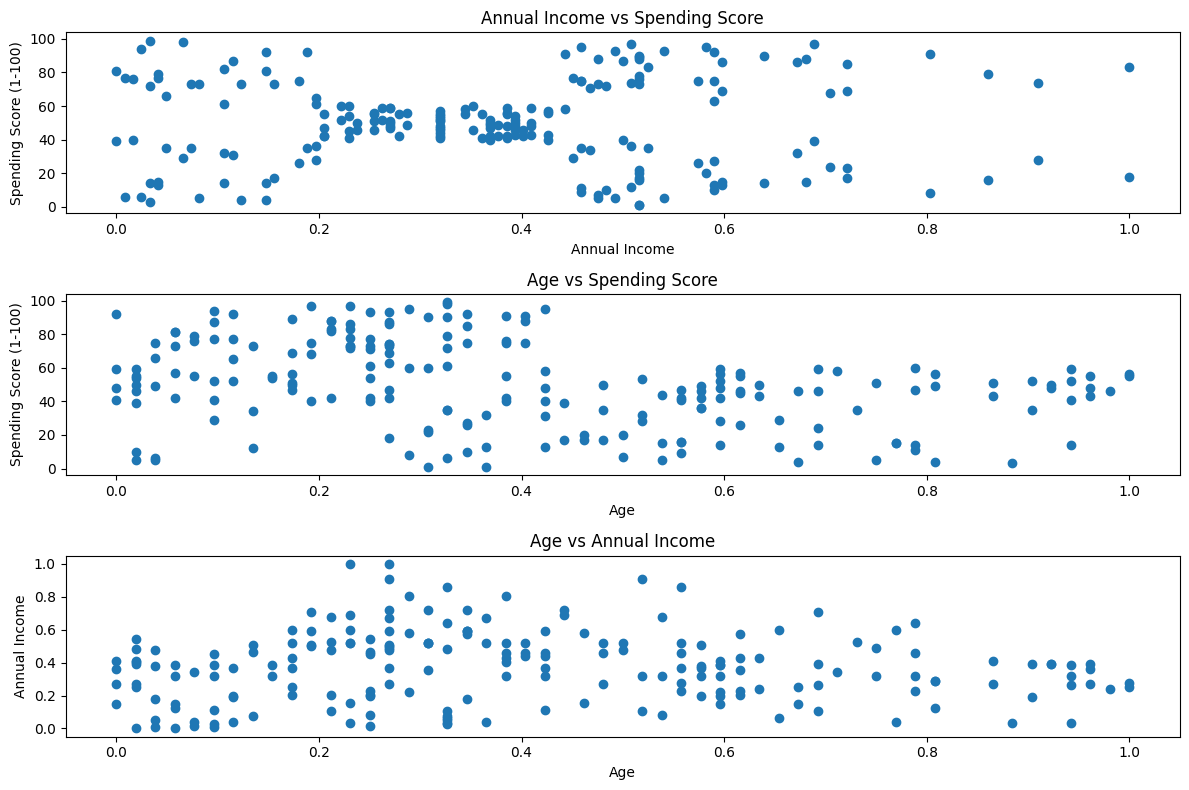

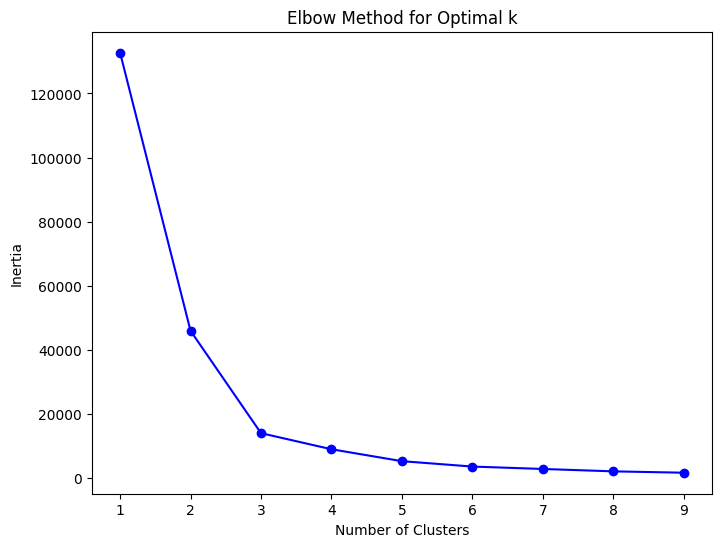

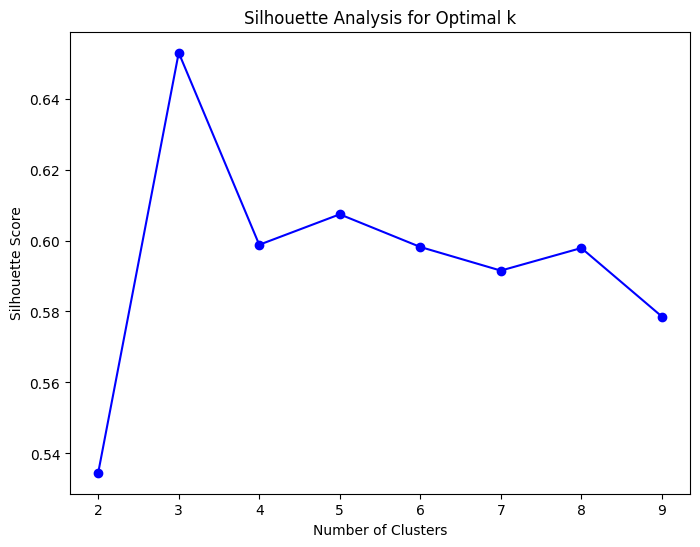

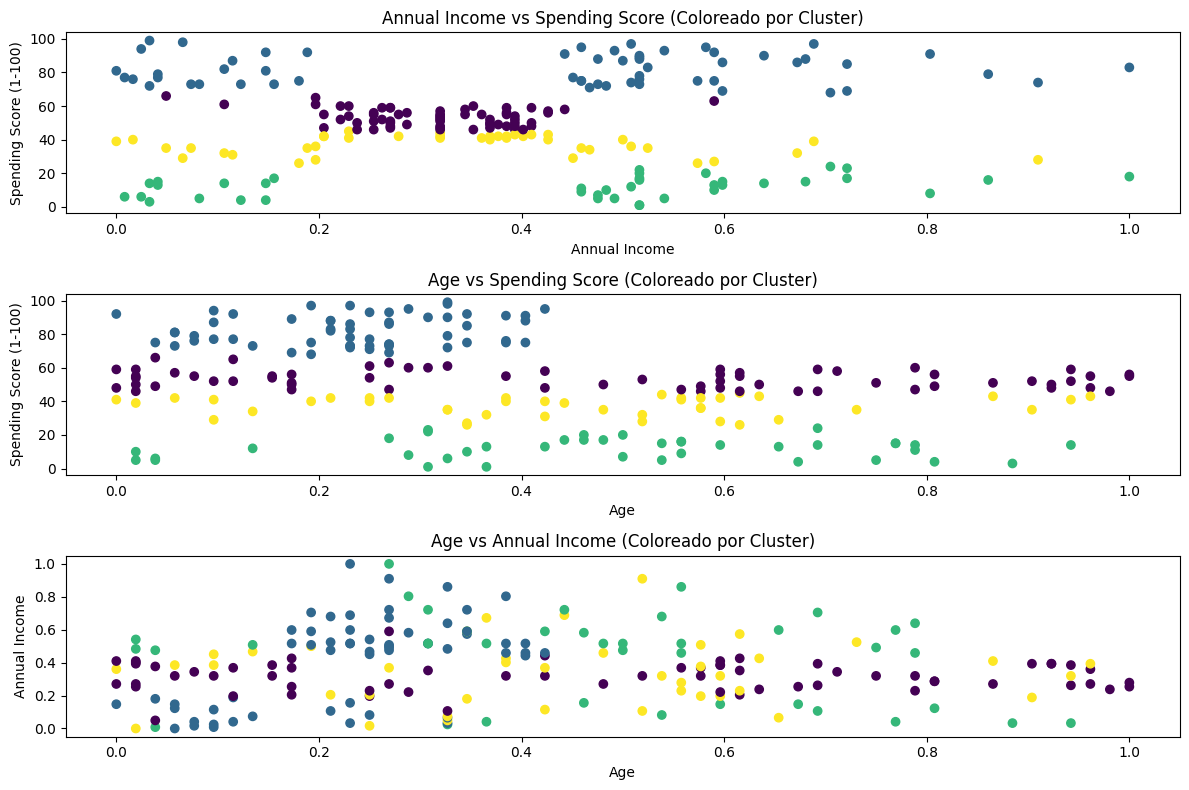

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import os

# Cargar el archivo CSV
df = pd.read_csv('clientes_shopping.csv')

# Normalización usando Min-Max Scaling para las columnas 'Age' y 'Annual Income'
scaler = MinMaxScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])

# Primera visualización sin clusters (gráficos originales)
plt.figure(figsize=(12, 8))

# Gráfico 1: Annual Income vs Spending Score
plt.subplot(3, 1, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

# Gráfico 2: Age vs Spending Score
plt.subplot(3, 1, 2)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Gráfico 3: Age vs Annual Income
plt.subplot(3, 1, 3)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()

# Método del Codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Análisis de la Silueta para confirmar el número de clusters
silhouette_scores = []

for k in range(2, 10):  # El análisis de silueta no es útil para k=1
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    score = silhouette_score(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], labels)
    silhouette_scores.append(score)

# Graficar las puntuaciones de silueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Determinar el número óptimo de clusters (ajusta el valor de `optimal_k` según los resultados)
optimal_k = 4  # Ajusta este valor con base en los resultados del método del codo y la silueta
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Segunda visualización con clusters coloreados
plt.figure(figsize=(12, 8))

# Gráfico 1: Annual Income vs Spending Score con clusters
plt.subplot(3, 1, 1)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Annual Income vs Spending Score (Coloreado por Cluster)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

# Gráfico 2: Age vs Spending Score con clusters
plt.subplot(3, 1, 2)
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.title('Age vs Spending Score (Coloreado por Cluster)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Gráfico 3: Age vs Annual Income con clusters
plt.subplot(3, 1, 3)
plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Cluster'], cmap='viridis')
plt.title('Age vs Annual Income (Coloreado por Cluster)')
plt.xlabel('Age')
plt.ylabel('Annual Income')

plt.tight_layout()
plt.show()
